<a href="https://colab.research.google.com/github/angela-kralevska/COVID19_MK_project/blob/master/COVID_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
  <img alt="COVID **LOGO**" height="30px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/SARS-CoV-2_without_background.png/895px-SARS-CoV-2_without_background.png" hspace="10px" vspace="0px">
  Предвидување на број на новозаразени од Корона вирус во Македонија
</h1>
<center><h3><i>Ангела Кралевска<i><h3></center>

---

### Монтирање на Google Drive податочниот систем

За да ја поставам работната околина, ќе го користам пример кодот што Google го обезбедува во секцијата за Google Sheets. Кодот во основа се справува со автентикацијата и ја увезува ```gspread``` библиотеката што овозможува комуникација со Google Sheets. 

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

Исто така ќе направам import на уште две библиотеки: **Pandas** (за обработка и анализа на податоци) и **Matplotlib** (за визуелизација):

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

### Вчитување на податоците

Откако ја поставив работната околина, следно е да ги вчитам податоците. Податоците со кои што ќе работам се преземени од сајтот на владата на Република Македонија. Во базата на податоци се прикажани детални статистики за дневниот број на заболени, оздравени и починати од Корона вирусот на територијата на Македонија. 

Библиотеката ```gspread``` овозможува лесна комуникација со Google Sheets, се што ми треба е URL-то. За пристап до Google Sheet, ја користам функцијата ```gspread``` ``` open_by_url () ```, која што ја пристапувам со објектот ```gc``` што го дефинирав погоре.

Откако ќе ги добијам сите вредности, ќе ги конвертирам во **Pandas DataFrame**.

In [34]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1OuCLvfoM36kGlLFqkAbD_Ke-YQw97ZuRNKxlg9-zLGI/edit#gid=0')
sheet = wb.sheet1
data = sheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
df

,Date,Заболени,Излечени,Починати вкупно
1,"Feb 26, 2020",1,0,0
2,"Feb 27, 2020",1,0,0
3,"Feb 28, 2020",1,0,0
4,"Feb 29, 2020",1,0,0
5,"Mar 1, 2020",1,0,0
...,...,...,...,...
73,"May 8, 2020",1586,1099,90
74,"May 9, 2020",1622,1112,91
75,"May 10, 2020",1642,1136,91
76,"May 11, 2020",1664,1200,91


Со вака вчитани податоци имаме мал проблем, бидејќи типот на сите податоци е автоматски сетиран како string.

In [35]:
# пристап до првата редица, колоната за заболени

type(df.iloc[0][1])

str

За да го решам овој проблем ќе направам dictionary во кој ќе ги дефинирам типовите на податоци.

In [36]:
new_df_schema = {
'Датум': df['Date'].astype(str),
'Заболени': df['Заболени'].astype(int),
'Излечени': df['Излечени'].astype(int),
'Починати': df['Починати вкупно'].astype(int)
}

covid19_mk_df = pd.DataFrame(new_df_schema)
covid19_mk_df['Датум'] = pd.to_datetime(covid19_mk_df['Датум'])

covid19_mk_df

,Датум,Заболени,Излечени,Починати
1,2020-02-26,1,0,0
2,2020-02-27,1,0,0
3,2020-02-28,1,0,0
4,2020-02-29,1,0,0
5,2020-03-01,1,0,0
...,...,...,...,...
73,2020-05-08,1586,1099,90
74,2020-05-09,1622,1112,91
75,2020-05-10,1642,1136,91
76,2020-05-11,1664,1200,91


Може да провериме дали типот на податоци е точно дефиниран.

In [37]:
covid19_mk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 1 to 77
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Датум     77 non-null     datetime64[ns]
 1   Заболени  77 non-null     int64         
 2   Излечени  77 non-null     int64         
 3   Починати  77 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.5 KB


Бидејќи нашите пофатоци се акумулирани, ќе ја одземеме секоја вредност од претходната за да ги добиеме во формата која ја сакаме. Наместо вкупно заболени, излечени и починати, ќе го добиеме бројот на заболени, излечени и починати по ден.

In [76]:
cov_mk = covid19_mk_df.diff()
values = {'Заболени': 1, 'Излечени': 0, 'Починати': 0}
cov_mk = cov_mk.fillna(value=values)
cov_mk['Датум'] = covid19_mk_df['Датум']
cov_mk

,Датум,Заболени,Излечени,Починати
1,2020-02-26,1.0,0.0,0.0
2,2020-02-27,0.0,0.0,0.0
3,2020-02-28,0.0,0.0,0.0
4,2020-02-29,0.0,0.0,0.0
5,2020-03-01,0.0,0.0,0.0
...,...,...,...,...
73,2020-05-08,14.0,20.0,1.0
74,2020-05-09,36.0,13.0,1.0
75,2020-05-10,20.0,24.0,0.0
76,2020-05-11,22.0,64.0,0.0


### Начин да се вчитаат податоци доколку би немале готов .csv фајл

Web scraping во Python се однесува на извлекување корисни податоци од веб-страниците кои се напишани во HTML. За да го направам тоа ќе треба да инсталирам неколку пакети.

In [38]:
!pip install requests
!pip install beautifulsoup4
import requests
import bs4

Следно го копираме URL-то и ги извлекуваме и форматираме податоците. На страната која ни беше посочена како извор на податоци може да се најде податок само за еден ден (нема или јас не можам да најдам табела за повеќе денови, освен дневните известувања кои не се пишувани по шема и е тешко од нив да се извлечат токму тие бројки што ни требаат).

In [45]:
WP_URL = "https://koronavirus.gov.mk/en/media-center"

# Правиме лажен агент на корисник за веб страната да мисли дека пристапува човек 
web_page = bs4.BeautifulSoup(requests.get(WP_URL, headers={
    "UserAgent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.183 Safari/537.36"
}).text, "lxml")

# Наоѓање на датумот на кој се последно променети податоците
date = web_page.find_all(name="div", attrs={"class": "et_pb_text_14"})[0].find_all(name="div", attrs={"class": "et_pb_text_inner"})[0].text[32:40]

# Наоѓање на податоците
table = web_page.find_all(name="div", attrs={"class": "et_pb_row_3"})[0]
title1 = table.find_all(name="div", attrs={"class": "et_pb_column"})[1].find_all(name="div", attrs={"class": "et_pb_text_inner"})[1].text
data1 = table.find_all(name="div", attrs={"class": "et_pb_column"})[1].find_all(name="div", attrs={"class": "et_pb_text_inner"})[0].text
title2 = table.find_all(name="div", attrs={"class": "et_pb_column"})[2].find_all(name="div", attrs={"class": "et_pb_text_inner"})[1].text
data2 = table.find_all(name="div", attrs={"class": "et_pb_column"})[2].find_all(name="div", attrs={"class": "et_pb_text_inner"})[0].text
title3 = table.find_all(name="div", attrs={"class": "et_pb_column"})[3].find_all(name="div", attrs={"class": "et_pb_text_inner"})[1].text
data3 = table.find_all(name="div", attrs={"class": "et_pb_column"})[3].find_all(name="div", attrs={"class": "et_pb_text_inner"})[0].text   

# Форматирање на податоците
data_frame = pd.DataFrame({"Date":[date], 
                   title1:[data1],  
                   title2:[data2], 
                   title3:[data3]})

data_frame.head()


,Date,Total number of infected with COVID-19,Cured from COVID-19,Deceased from COVID-19
0,03.05.20,1511,945,84


### Визуелизација на податоците

Во овој дел ќе направам визуелизација и кратки анализи на податоците, за да имам подобра претстава за нив.

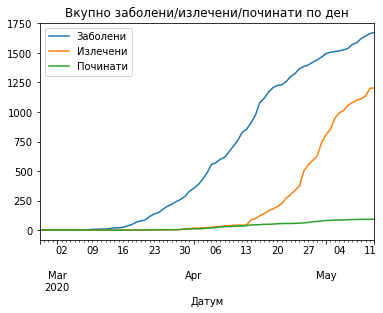

In [40]:
#@title График за претставување на вкупниот број на заболени/излечени/починати по ден 

covid19_mk_df.set_index('Датум')['Заболени'].plot();
covid19_mk_df.set_index('Датум')['Излечени'].plot();
covid19_mk_df.set_index('Датум')['Починати'].plot();
plt.title("Вкупно заболени/излечени/починати по ден");
plt.legend(['Заболени', 'Излечени', 'Починати'], loc='upper left');

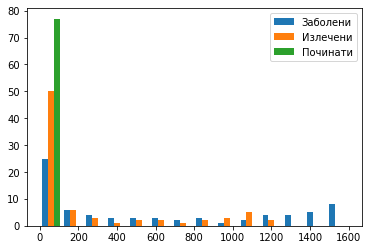

In [41]:
#@title Хистограм за да се воочи распределбата на податоците
import random
import numpy
from matplotlib import pyplot

x = covid19_mk_df['Заболени']
y = covid19_mk_df['Излечени']
z = covid19_mk_df['Починати']

bins = numpy.linspace(0, 1600, 15)

plt.hist([x, y, z], bins, label=['Заболени', 'Излечени', 'Починати'])
plt.legend(loc='upper right')
plt.show()

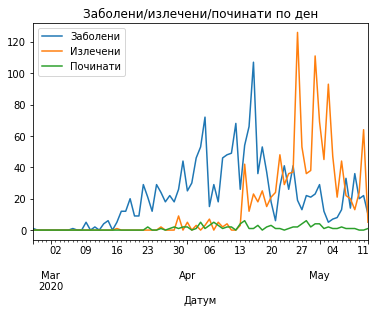

In [81]:
#@title График за претставување на бројот на заболени/излечени/починати по ден

cov_mk.set_index('Датум')['Заболени'].plot();
cov_mk.set_index('Датум')['Излечени'].plot();
cov_mk.set_index('Датум')['Починати'].plot();
plt.title("Заболени/излечени/починати по ден");
plt.legend(['Заболени', 'Излечени', 'Починати'], loc='upper left');

### Тренирање на модел

CPython 3.6.9
IPython 5.5.0

numpy 1.18.4
pandas 1.0.3
torch 1.5.0+cu101
Epoch 0 train loss: 5.04380989074707 test loss: 0.2845936417579651
Epoch 10 train loss: 2.449073314666748 test loss: 0.08260804414749146
Epoch 20 train loss: 2.318754196166992 test loss: 0.08983858674764633
Epoch 30 train loss: 1.9034371376037598 test loss: 0.11667481064796448
Epoch 40 train loss: 1.4784168004989624 test loss: 0.07905606925487518
Epoch 50 train loss: 1.271017074584961 test loss: 0.10238709300756454


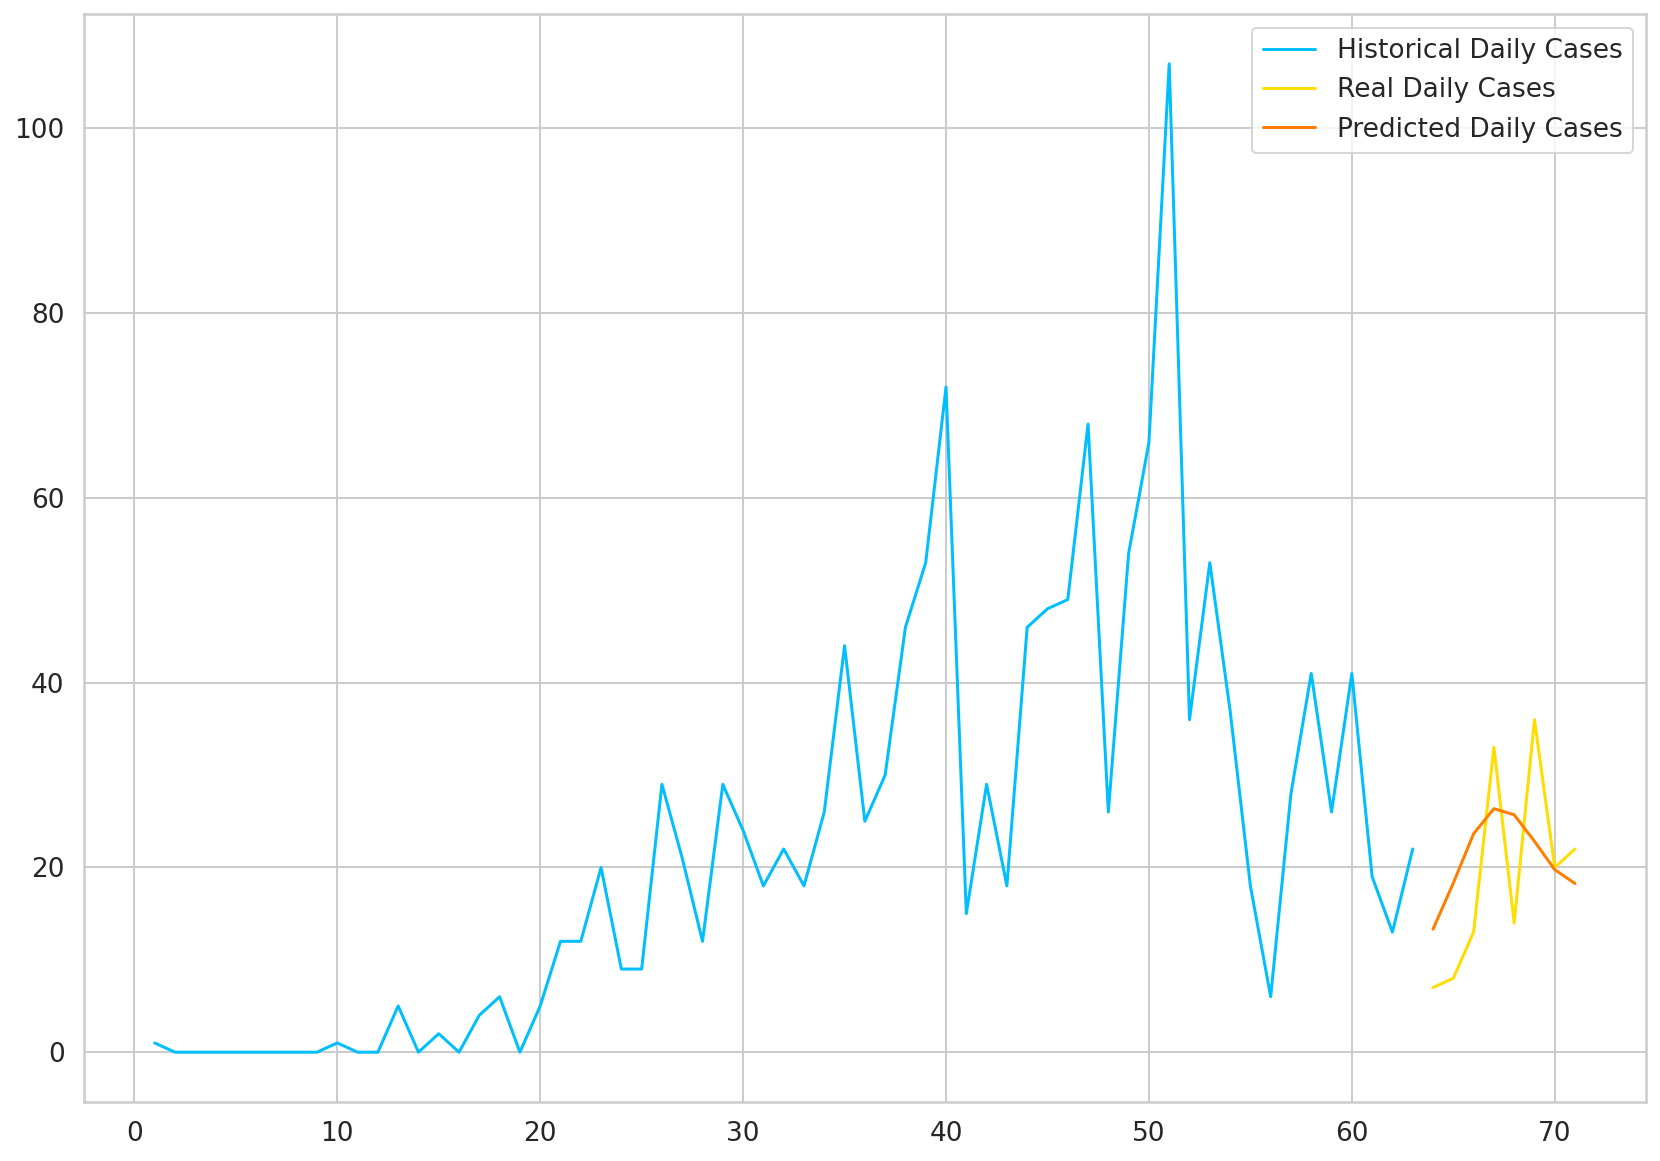

In [92]:
!pip install -Uq watermark
%reload_ext watermark
%watermark -v -p numpy,pandas,torch
import torch

import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

test_data_size = 14

train_data = cov_mk['Заболени'][:-test_data_size]
test_data = cov_mk['Заболени'][-test_data_size:]

scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(train_data, axis=1))

train_data = scaler.transform(np.expand_dims(train_data, axis=1))

test_data = scaler.transform(np.expand_dims(test_data, axis=1))

def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

seq_length = 5
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

class CoronaVirusPredictor(nn.Module):

  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(CoronaVirusPredictor, self).__init__()

    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers

    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )

    self.linear = nn.Linear(in_features=n_hidden, out_features=1)

  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )

  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

def train_model(
  model, 
  train_data, 
  train_labels, 
  test_data=None, 
  test_labels=None
):
  loss_fn = torch.nn.MSELoss(reduction='sum')

  optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
  num_epochs = 60

  train_hist = np.zeros(num_epochs)
  test_hist = np.zeros(num_epochs)

  for t in range(num_epochs):
    model.reset_hidden_state()

    y_pred = model(X_train)

    loss = loss_fn(y_pred.float(), y_train)

    if test_data is not None:
      with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred.float(), y_test)
      test_hist[t] = test_loss.item()

      if t % 10 == 0:  
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')

    train_hist[t] = loss.item()
    
    optimiser.zero_grad()

    loss.backward()

    optimiser.step()
  
  return model.eval(), train_hist, test_hist

model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model, 
  X_train, 
  y_train, 
  X_test, 
  y_test
)



with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

plt.plot(
  cov_mk['Заболени'].index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  cov_mk['Заболени'].index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  cov_mk['Заболени'].index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)

plt.legend();